# Homework 1 (Support Vector Machines)

Using the data [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/hw1.csv), build a series of SVM models as described. Make sure that data is **z score appropriately** before fitting your models. Due to the number of models you're fitting with GridSearch, this make take a while to run.

- A. 💻 Load your data and do a 80/20 Train Test Split
- B. 💻 Use sklearn to build an SVM model. Use `GridSearchCV` to choose the `kernel` (choose from `linear` and `rbf`), `C` (choose from `[0.001, 0.01, 1, 5, 25, 50]`), and `gamma` (choose from `[0.001,0.01, 0.1, 0.5, 1,2,5]`). Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices. 
- C. ✍️ What hyperparameters did GridSearch choose? (in a TEXT CELL)
- D. 💻 Use sklearn to build a Logistic Regression on the same data with the same train/test set. Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices. ([CPSC 392 code](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Lectures/LectureNotebooks/Logistic_Regression_II--Class9.ipynb))
- E. 💻 Use sklearn to build a KNearest Neighbors model on the same data with the same train/test set (use GridSearch to choose `n_neighbors`).Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.   ([CPSC 392 code](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Lectures/LectureNotebooks/KNN--Class_14.ipynb))
- F. ✍️ Discuss in detail how your models performed based on the metrics you printed. Write this discussion as if you are presenting your results to a CEO/Stakeholder (in a TEXT CELL)
- G. ✍️ Compare the performance of your model to the Logistic Regression and KNN model, and provide a justification for which model you want to use "in production" (in a TEXT CELL)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# data and plotting
import pandas as pd
import numpy as np
from plotnine import *

# preprocessing
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, plot_confusion_matrix

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# pipelines
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\isaac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\__init__.py)

### A. Loading Data with a 80/20 Train Test Split

In [ ]:
# importing CSV

url = "https://raw.githubusercontent.com/cmparlettpelleriti/CPSC393ParlettPelleriti/main/Data/hw1.csv"
df = pd.read_csv(url)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Group
0,-0.604285,-0.610629,0.026014,0.019710,0.406532,0.678796,0.524360,0.404739,B
1,-0.111772,-1.125178,0.744157,0.078315,0.088176,0.891009,0.018460,0.536511,B
2,-0.916802,1.965494,0.150022,0.388770,0.179276,0.064449,0.159279,0.951204,B
3,-0.280479,0.920669,0.208949,0.940153,0.854437,0.688172,0.365126,0.985259,A
4,1.856025,1.043214,0.167088,0.207002,0.979049,0.641019,0.628764,0.045912,B


In [ ]:
# checking for missing data
df.isnull().sum()

X1       0
X2       0
X3       0
X4       0
X5       0
X6       0
X7       0
X8       0
Group    0
dtype: int64

In [ ]:
predictors = ["X1", "X2", "X3", "X4", "X5","X6", "X7", "X8"]

X = df[predictors]
y = df["Group"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### B. SVM Model

In [ ]:
# Z scoring
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

# Creating SVM model
svm = SVC(probability = True)

pipe = make_pipeline(z,svm)

param_grid = {
    'svc__kernel': ['linear', 'rbf'], 
    'svc__C': [0.001, 0.01, 1, 5, 25, 50], 
    'svc__gamma': [0.001, 0.01, 0.1, 0.5, 1, 2, 5]
}

# GridSearchCV for Hyperparameter Tuning
grid = GridSearchCV(pipe, param_grid = param_grid, scoring = "accuracy", cv = 5, refit = True)

# Fitting Model
grid.fit(X_train, y_train)

# Best Parameters
print("Best hyperparameters: ", grid.best_params_)

# Accuracy of SVM Model for train and test sets
print("Train Acc:", accuracy_score(y_train, grid.predict(X_train)))
print("Test Acc :", accuracy_score(y_test, grid.predict(X_test)))

# ROC/AUC for train and test sets
print("Train AUC:", roc_auc_score(y_train, grid.predict_proba(X_train)[:,1]))
print("Test AUC :", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))


Best hyperparameters:  {'svc__C': 1, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}
Train Acc: 0.76875
Test Acc : 0.735
Train AUC: 0.846721269119471
Test AUC : 0.8235666772252138


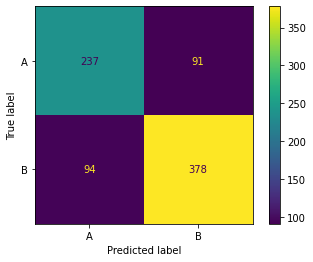

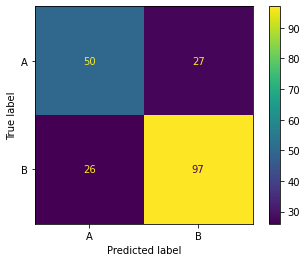

In [ ]:
# Confusion matrix of train set
plot_confusion_matrix(grid, X_train, y_train)

# Confusion matrix of test set
plot_confusion_matrix(grid, X_test, y_test)


### C. Selected Hyperparameters

GridSearch found that the kernel "rbf" with a C of "25" and a gamma of "0.001" was the best.

### D. Logistic Regression Model

D. 💻 Use sklearn to build a Logistic Regression on the same data with the same train/test set. Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.

The accuracy score of the train set is:  0.7675
The accuracy score of the test set is:  0.74
Train AUC: 0.8480518809425384
Test AUC : 0.826206314011192


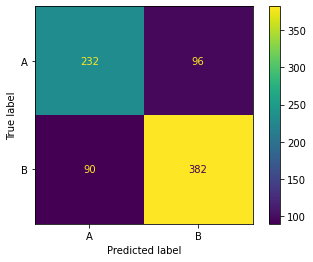

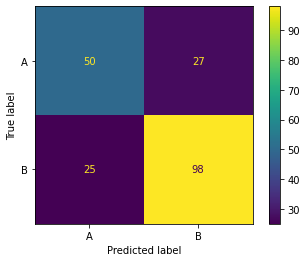

In [ ]:
# Logistic Regression Model

# Creating model
lr = LogisticRegression(penalty = "none")

# Z-scoring
z = StandardScaler()
z.fit(X_train)
z_train = z.transform(X_train)
z_test = z.transform(X_test)

# Fitting model
lr_model = lr.fit(X_train, y_train)

# Accuracy of the train and test set
accuracy_train = accuracy_score(y_train, lr_model.predict(X_train))
accuracy_test = accuracy_score(y_test, lr_model.predict(X_test))
print('The accuracy score of the train set is: ', accuracy_train)
print('The accuracy score of the test set is: ', accuracy_test)

# ROC/AUC of the train and test set
print("Train AUC:", roc_auc_score(y_train, lr_model.predict_proba(X_train)[:,1]))
print("Test AUC :", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1]))

# Confusion matrix of train set
plot_confusion_matrix(lr_model, X_train, y_train)

# Confusion matrix of test set
plot_confusion_matrix(lr_model, X_test, y_test)



### E. K-Nearest Neighbors

Use sklearn to build a KNearest Neighbors model on the same data with the same train/test set (use GridSearch to choose `n_neighbors`).Print out the train and test accuracies and ROC/AUCs, and plot the train and test confusion matrices.   ([CPSC 392 code](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Lectures/LectureNotebooks/KNN--Class_14.ipynb))

Train Accuracy :  0.86
Test Accuracy :  0.825


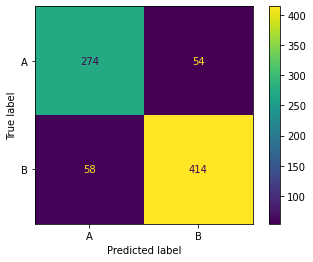

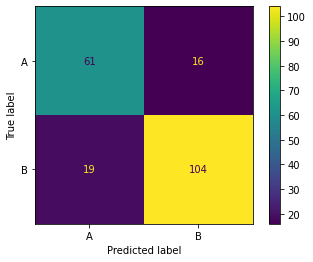

In [ ]:
# K-Nearest Neighbors

# Creating model
knn = KNeighborsClassifier()

# Z-scoring
z = make_column_transformer((StandardScaler(), predictors),
                            remainder = "passthrough")

# GridSearch for 'n_neighbors'
param_grid = {'n_neighbors': np.arange(1, 30)}

grid_search = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_n_neighbors = grid_search.best_params_['n_neighbors']

knn = KNeighborsClassifier(n_neighbors = best_n_neighbors)

# Fitting model
knn.fit(X_train, y_train)

# Accuracy of the train and test set
print('Train Accuracy : ', knn.score(X_train, y_train))
print('Test Accuracy : ', knn.score(X_test, y_test))

# ROC/AUC of the train and test set

# Confusion Matrices for the train and test set
plot_confusion_matrix(knn, X_train, y_train)
plot_confusion_matrix(knn, X_test, y_test)